# New York Times Text Analysis.

In this notebook, we'll realize text cleaning and analyze text from the New York Times. We'll start by loading and importing the needed packages.

In [3]:
%matplotlib inline
import numpy as np #Linear algebra.  
import matplotlib.pyplot as plt # Plotting.
import re #Regular Expressions.
import pandas as pd #Dataframes


And now, let's load the data, that is stored in a csv file. We'll use the latin encoding, since some special characters included in the text aren't accepted by the regularr UTF-8 encoding.

In [4]:
data = pd.read_csv("data.csv",encoding='latin1')
comparison_data = data.copy()

With that out of the way, let's take a look at the data.

In [46]:
print(comparison_data.text[0])
print(" ")
print(stemmed_dataset.text[0])
print(" ")
data.text[0]

Open the mobile phone application offered by a French real estate agency and point your phone at a building along the  or some other street in Paris. Within seconds, you will see the propertys value per square meter, superimposed over a live image of the building streamed through the phones camera. Speed and convenience delivered with the aim of a smartphone. Could this be the new frontier of on-demand property search? It depends whom you ask. The application, engineered by Layar, a 10-month-old company based in Amsterdam, uses augmented reality technology, or A.R., to harness a phones camera, global positioning system and compass. Elements like statistics and 3-D images are, essentially, layered over a live picture so the user gets a single view with all available information. These A.R. mash-ups already are being used to display information about tourist sites, chart subway stops and restaurants, allow interior designers to superimpose new furniture or color schemes on a room,

'open mobile phone application offered french real estate agency point phone building along street paris within seconds see property value per square meter superimposed over live image building streamed through phone camera speed convenience delivered aim smartphone new frontier demand property search depends ask application engineered layar month old company based amsterdam uses augmented reality technology harness phone camera global positioning system compass elements statistics images essentially layered over live picture user gets single view available information mash ups already being used display information tourist sites chart subway stops restaurants allow interior designers superimpose new furniture color schemes room'

The data contains the type of a piece of text, followed by a chunk of the text itself. The type basically labels the category of the text. Let's see how many types of text exist in the dataset.

In [6]:
data.type.unique()

array(['technology', 'fashion&style', 'business'], dtype=object)

There three types are technology, fashion&style and business. How about the shape of the dataset? How many rows are there?

In [7]:
data.shape #Get rows and columns of the dataset.

(210, 2)

In [8]:
data.groupby("type").agg('count') # Get the count for each type of the text.

text
type               
business         70
fashion&style    70
technology       70

So there are 210 rows, and 2 columns, and as specified, 70 labels for each of the 3 types.

## Cleaning the text.

To clean the text, we have to go through three simple steps:

1. Removing all non-alphabetic characters like punctuation marks, numbers, quotation marks and the like.
2. Converting all text into lower case letters.
3. Removing "stopwords", words that have no analytical value like and,to,by,etc.

To realize this process, we create a function, clean text, to clean all the text of the data in one go!

In [9]:
stopwords = open("stop-word-list.csv","r").read() #Read the file with the stopwords, and load the wods.
stopwords_list = stopwords.split(",") #Split that long comma separated list of words into a python list.
cleaned_words = [re.sub(" ","",word) for word in stopwords_list] #Replace whitespaces in the list with nothing.
stopwords = dict.fromkeys(cleaned_words) #Create a dinctionary with the stopwords for faster access.

In [10]:
def Clean_Text(text):
    
    #Remove all non letters.
    letters_only = re.sub("[^a-zA-Z]"," ", text )

    words = letters_only.lower().split()
    
    #Remove stopwords from review.
    removed_stops = [w for w in words if not w  in stopwords and len(w)!=1]
    
    return " ".join(removed_stops)


In [11]:
cleaned_text = data.text.apply(lambda new_text: Clean_Text(new_text)) #Apply the function per row.
data.text = cleaned_text
data.head(10)

type                                               text
0  technology  open mobile phone application offered french r...
1  technology  give crime statistics specific area beatles to...
2  technology  thousand downloads week feedback totally great...
3  technology  technology similar range uses including real e...
4  technology  telecom industry ripe consolidation mexican bi...
5  technology  billion according mergermarket analysis firm a...
6  technology  mobile markets mature static handful operators...
7  technology  more confidence investors penalize companies p...
8  technology  technology improve healthcare american man ave...
9  technology  affordable useful web sites personal data base...

And voila, the text is now cleaned and separated into individual words. With this, text cleaning is complete.

## Task 2: Visualize categories.

To visualize the word count by categories, we'll first build a function that counts all the words of a given text dataframe.  We'll use this function for each category.

In [12]:
def Get_Word_Count(dataframe):
    #Get the word count for a particular dataframe.
    result = {}
    #Iterate through words of the review
    for words in dataframe.text:
        #Check if a word is already in the dictionary. If it is add 1 to the counter, else add it to the dict.
        for word in words.split(' '):
            if word not in result :
                result[word]= 1
            else:
                result[word]+=1
    #Convert dictionary to a dataframe, for better plotting.
    df = pd.DataFrame({"Word": list(result.keys()),"Count":list(result.values())})
    #Sort by count.
    return df.sort_values(by="Count",ascending=False)


Tech_Words = Get_Word_Count(data.loc[data.type == "technology"])
Fashion_Words = Get_Word_Count(data.loc[data.type == "fashion&style"])
Business_Words = Get_Word_Count(data.loc[data.type == "business"])

Now, we create the matplotlib parameters so the plots look fancier.

In [13]:
def Set_Parameters():
    from matplotlib import rcParams
    rcParams['figure.figsize'] = (10, 6) # Size of plot
    rcParams['figure.dpi'] = 150 #Dots per inch of plot
    rcParams['lines.linewidth'] = 2 # Width of lines of the plot
    rcParams['axes.facecolor'] = 'white' #Color of the axes
    rcParams['font.size'] = 14 # Size of the text.
    rcParams['patch.edgecolor'] = 'white' #Patch edge color.
    rcParams['font.family'] = 'StixGeneral' #Font of the plot text.

And finally, we start creating the plots. 

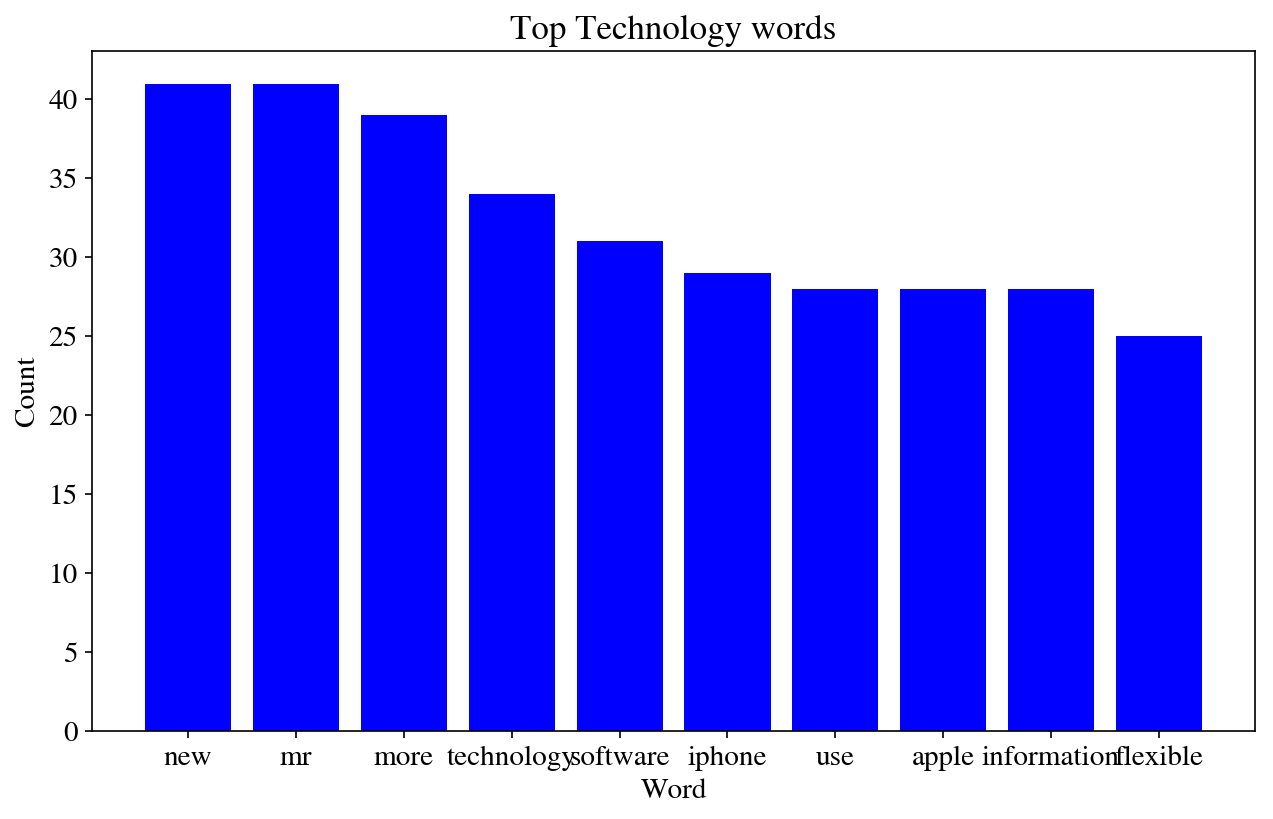

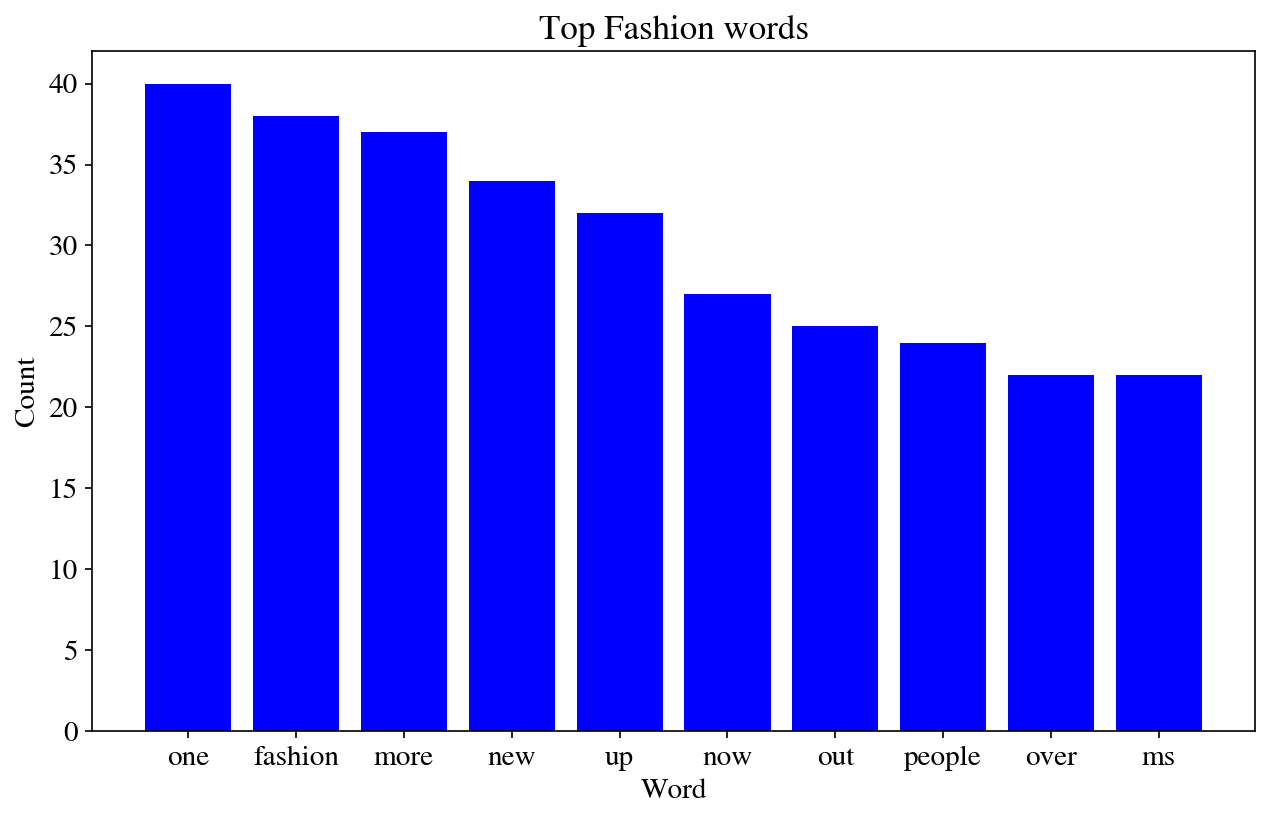

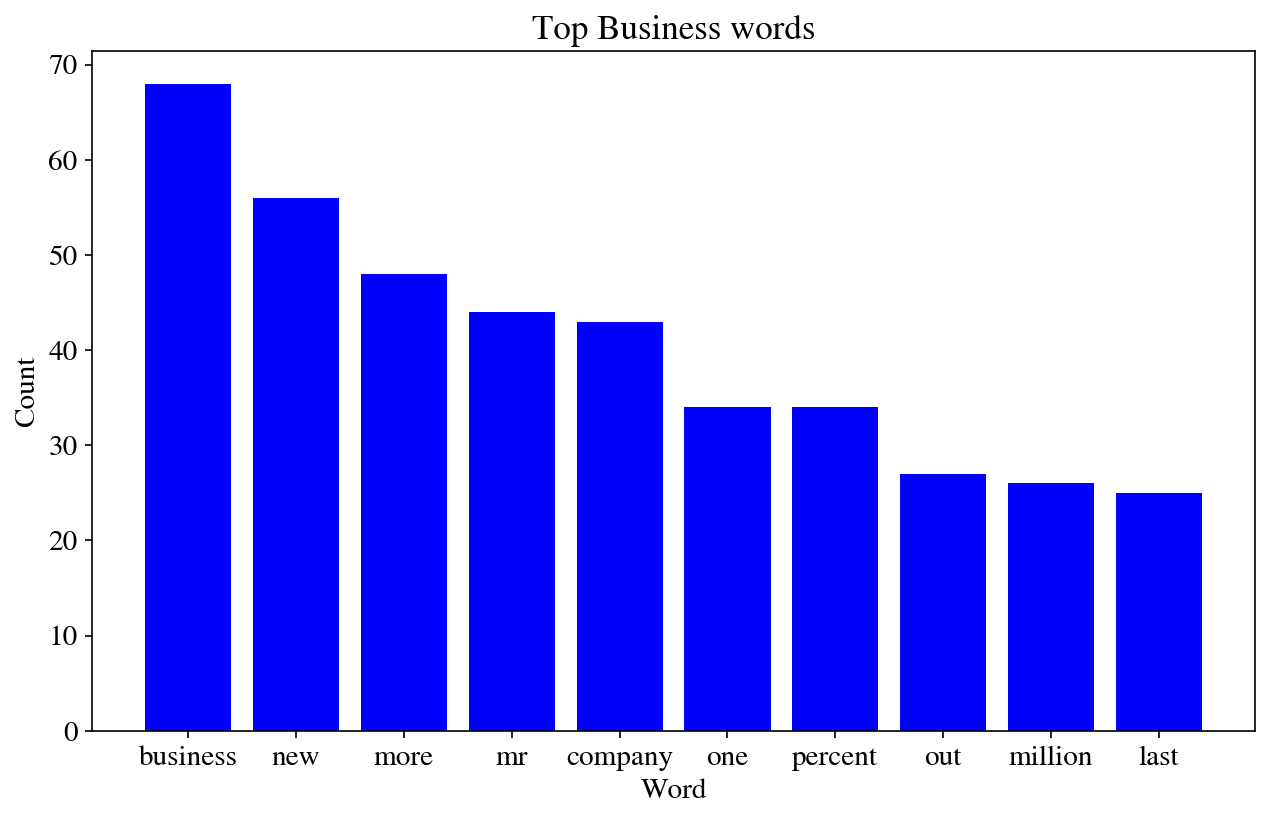

In [14]:
Set_Parameters()
def plot_words(dataframe,label):
    plot_df = dataframe.head(10)
    x = np.arange(0,10,1) #Get arbitrary x axis values.
    y = plot_df.Count #y axis will be the counts.
    plt.bar(x,y,color = "blue") # Create the bar plot with a blue color.
    plt.title(label)
    plt.xticks(x,plot_df.Word) # Replace arbitrary x values with the most common words.
    plt.xlabel("Word")
    plt.ylabel("Count")
    plt.show()# Show the plot!
    
plot_words(Tech_Words,"Top Technology words")
plot_words(Fashion_Words,"Top Fashion words")
plot_words(Business_Words,"Top Business words")

For all three categories, the most mentioned word is said. Since the text is from the New York Times, it's to be expected that most of what's in the text are stories. And stories contain retellings of other people's quotes, so it's natural that the most common word is said. Now, special words for each category we have:

- Techonology: techonology, software, information, iphone, apple.
- Fashion: fashion, people, suit.
- Business: business, company, percent, million.

## Task 3 Calculate TF-IDF

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
def Calculate_tfidf(dataframe):
    #Convert all articles into a list of text.
    corpus = list(dataframe.text)
    #Create a TfIdf vectorizer with minimal document frequency 100%, and max document frequency 10%, for accuracy.
    vectorizer = TfidfVectorizer( min_df = 0.05, max_df = 0.1)
    #Calculate the sum of the weights for each label.
    vector_weights = vectorizer.fit_transform(corpus)
    #Get the real weight, by calculating the mean of the weights.
    weights= list(np.asarray(vector_weights.mean(axis=0)).ravel())
    #Convert it to a dataframe.
    df = pd.DataFrame({"Word":vectorizer.get_feature_names(),"Score":weights})
    #Sort them by score, and return it.
    return df,vector_weights.toarray()
    
        

In [16]:
#Calcualte TF-IDF per category.
Tech_tfidf,Tech_vect = Calculate_tfidf(data.loc[data.type == "technology"])
Business_tfidf,bus_vect = Calculate_tfidf(data.loc[data.type == "business"])
Fashion_tfidf,fashion_vect = Calculate_tfidf(data.loc[data.type == "fashion&style"])

In [17]:
def plot_scores(dataframe,label):
    plot_df = dataframe.sort_values(by="Score",ascending=False).head(10)
    x = np.arange(0,10,1) #Get arbitrary x axis values.
    y = plot_df.Score #y axis will be the scores.
    plt.bar(x,y,color = "orange") # Create the bar plot with a blue color.
    plt.title(label)
    plt.xticks(x,plot_df.Word, rotation = 'vertical') # Replace arbitrary x values with the most common words.
    plt.xlabel("Word")
    plt.ylabel("Score")
    plt.show()# Show the plot!

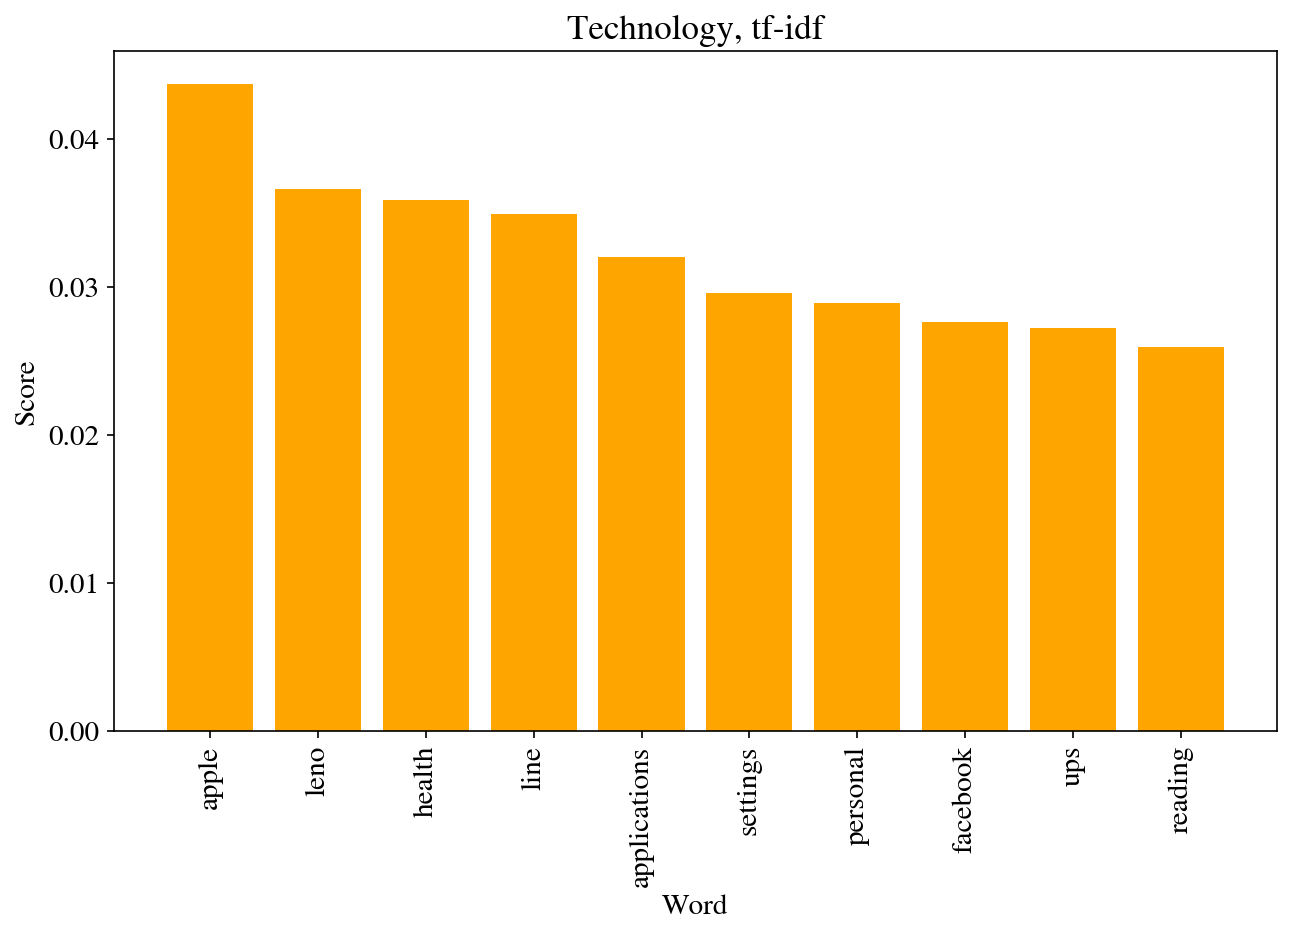

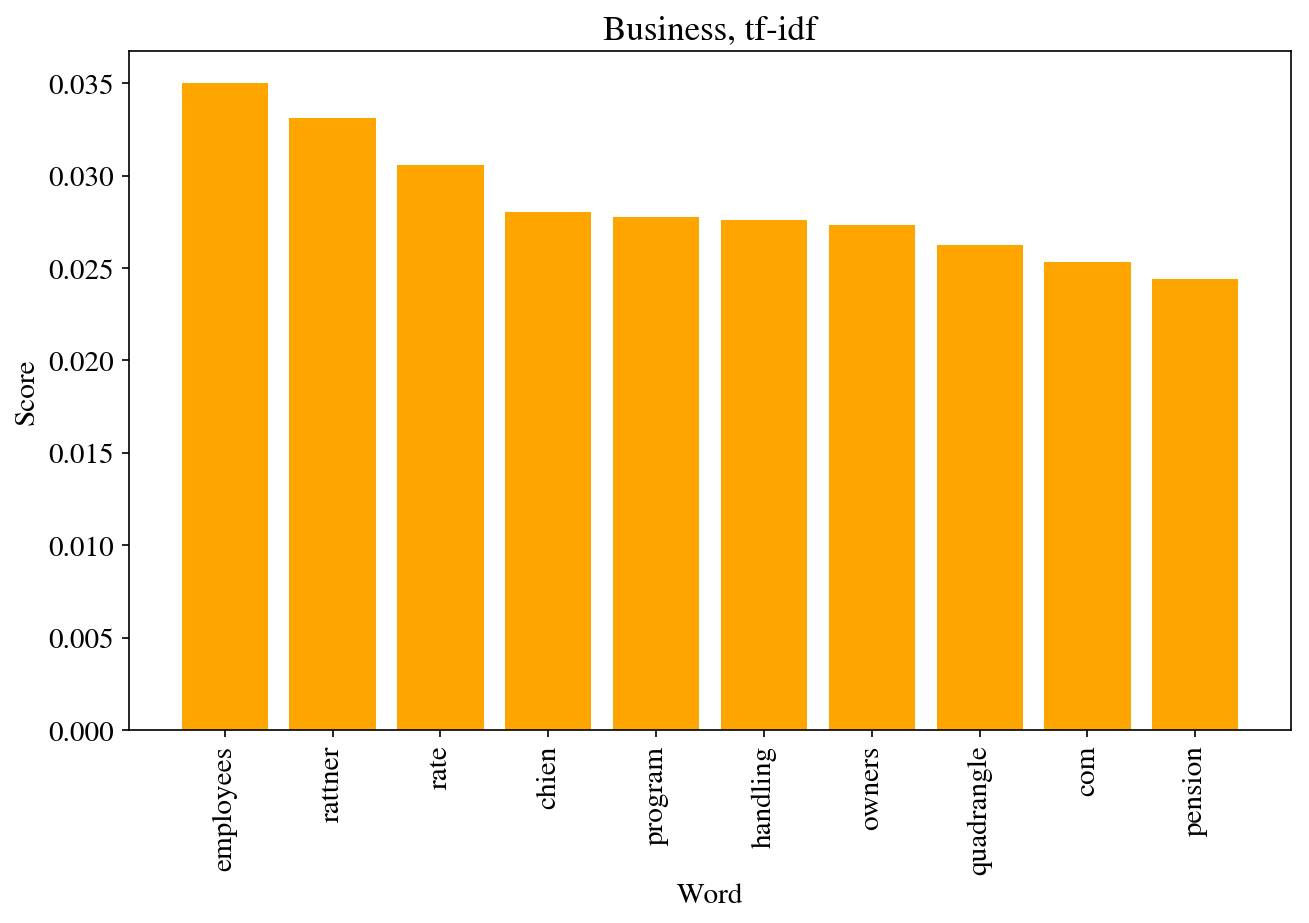

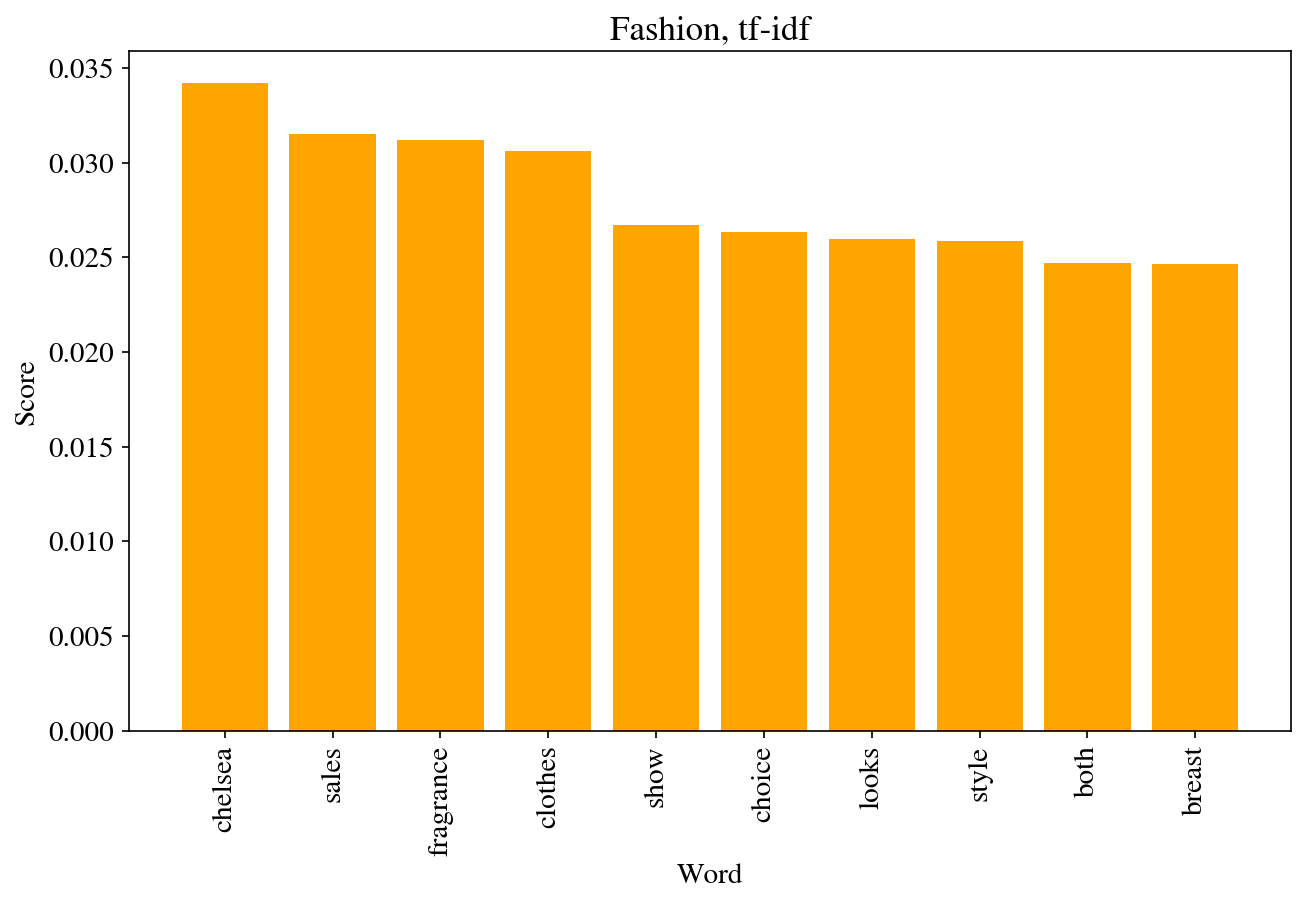

In [18]:

plot_scores(Tech_tfidf, "Technology, tf-idf")
plot_scores(Business_tfidf, "Business, tf-idf")
plot_scores(Fashion_tfidf, "Fashion, tf-idf")

## Task 4

To perform task 4, we just need to use the linear kernel from sklearn, to calculate the pair wise similarities of the tfidf matrix we calculated earlier on Task 3. This gives us the top 3 Related documents for each document.

In [19]:
from sklearn.metrics.pairwise import linear_kernel

def Find_Related_Docs(kernel_matrix,doc_id):
    #Returns top 3 related docs.
    cosine_similarities = linear_kernel(kernel_matrix[[doc_id]], kernel_matrix).flatten()
    related_docs_indices = cosine_similarities.argsort()[:-5:-1]
    return related_docs_indices[1:4]


In [20]:
def Top_3_Docs(doc_type):
    doc_vector,addition = " ",0
    if doc_type == "Technology":
        doc_vector = Tech_vect
        
    elif doc_type == "Business":
        doc_vector = bus_vect
        
    else:
        doc_vector = fashion_vect
    
    result = { }
    for i in range(0,len(doc_vector)):
        related = Find_Related_Docs(doc_vector,i)
        texts = []
        for index in related:
            texts.append(comparison_data.text[index])
        result[i] = texts
        
    return pd.DataFrame({"Text_ID":list(result.keys()),
                         "Related_Texts":list(result.values())}).set_index("Text_ID")
    
        

In [21]:
Tech_Related_Docs = Top_3_Docs("Technology")
Business_Related_Docs = Top_3_Docs("Business")
Fashion_Related_Docs = Top_3_Docs("Fashion")

In [22]:
def Display_Text_AndRelated(text_id,Related_Dataframe):
    print("Original Text:")
    print(comparison_data.text[text_id])
    print(" ")
    print("Related Text:")
    print(" ")
    for text in Related_Dataframe.Related_Texts[text_id]:
        print(text)
        print(" ")

In [23]:
Display_Text_AndRelated(0,Tech_Related_Docs)

Original Text:
Open the mobile phone application offered by a French real estate agency and point your phone at a building along the  or some other street in Paris. Within seconds, you will see the propertys value per square meter, superimposed over a live image of the building streamed through the phones camera. Speed and convenience delivered with the aim of a smartphone. Could this be the new frontier of on-demand property search? It depends whom you ask. The application, engineered by Layar, a 10-month-old company based in Amsterdam, uses augmented reality technology, or A.R., to harness a phones camera, global positioning system and compass. Elements like statistics and 3-D images are, essentially, layered over a live picture so the user gets a single view with all available information. These A.R. mash-ups already are being used to display information about tourist sites, chart subway stops and restaurants, allow interior designers to superimpose new furniture or color sch

## Task 5

To plot the heatmap, which is how correlated each word vector is, we just need to call matplotlib with the imshow method, and pass the parameter cmap = hot, so it knows that it must plot a heatmap. Since we have a ton of vectors and most of these are unrelated, the heatmap is mostly dark.

In [51]:
def Plot_Heatmap(kernel_matrix,title):
    plt.imshow(kernel_matrix,cmap='hot',interpolation='nearest')
    plt.ylabel("Text#")
    plt.xlabel("Vocabulary#")
    plt.title(title)
    plt.show()

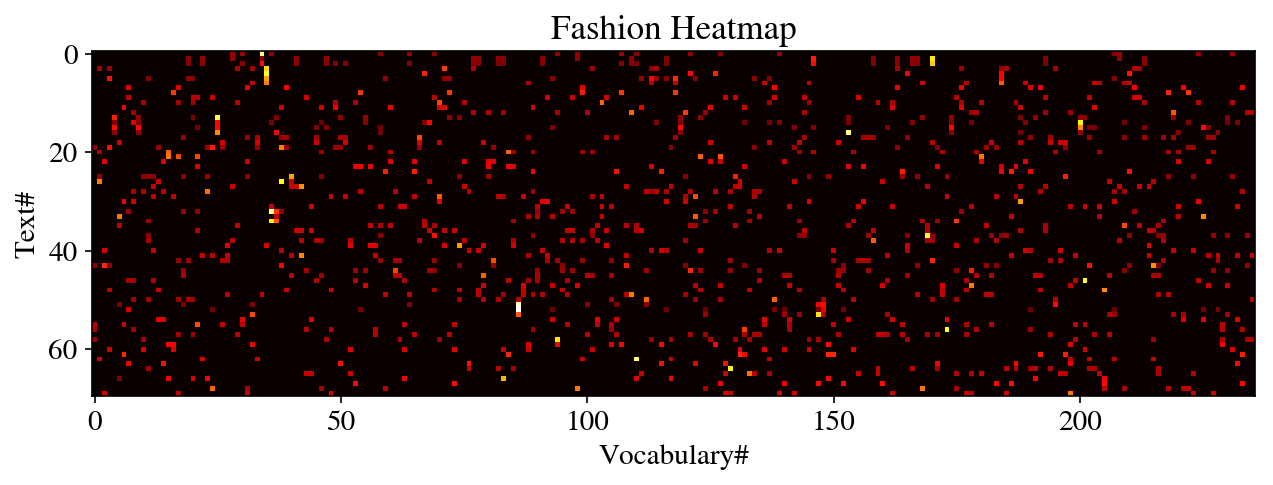

In [52]:
Plot_Heatmap(fashion_vect,"Fashion Heatmap")
Plot_Heatmap(Tech_vect,"Technology Heatmap")
Plot_Heatmap(bus_vect,"Business Heatmap")

## Task 6

To create a classifier model that classifies text into one of the three previously mentioned types, we'll use a KNearestNeighbors classifier. What this classifier does, is find at least K texts which the closest distance to the current text in training, and do a majority vote on the type of the text. If the majority of the texts near the text that is currently being analyzed is of technology for example, then the final predicted label will be technology. 

Since KNearestNeighbors uses only numbers, we must first convert the text types into numbers (1,2,3) and create a Vector of the vocabulary of the text (specifying that the word must appear at least in 1 text), with its counts. 

This leads to a vector with the types turned into numbers and a matrix of the counts of the words across the documents.

In [26]:
def encode_type(ttype):
    return {"technology":1,
            "fashion&style":2,
            "business":3
    }[ttype]


from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(min_df=1)
doc_term_matrix = count_vectorizer.fit_transform(list(data.text))
text_count = doc_term_matrix.toarray()
labels = data.type.apply(lambda ttype: encode_type(ttype))

We'll also create a function that **Optimizes** the KNearestNeighbors model, by iterating through a set list of K neighbors, and selecting the one that gives the best accuracy on the training set. Afterwards, we'll plot the change of the accuracy while the value of K changes.

In [56]:
from sklearn.neighbors import KNeighborsClassifier
def Plot_Accuracies(accuracy_list):
    x = range(2,30)
    y = accuracy_list
    plt.plot(x,y)
    plt.title("Accuracy as K increases")
    plt.xlabel("K")
    plt.ylabel("Accuracy")
    plt.show()


def Optimize_KClassifier():
    best_accuracy = 0
    best_k = 0
    accuracy_list = []
    for k in range(2,30):
        Kneigh_classifier = KNeighborsClassifier(n_neighbors=k)
        Kneigh_classifier.fit(text_count,labels)
        accuracy = Kneigh_classifier.score(text_count,labels)
        accuracy_list.append(accuracy)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    print("Best K is:" + str(best_k))
    Plot_Accuracies(accuracy_list)
    return best_k



In [57]:
best_k = Optimize_KClassifier()
Best_KClassifier = KNeighborsClassifier(n_neighbors = best_k)
Best_KClassifier.fit(text_count,labels)
accuracy = Best_KClassifier.score(text_count,labels)
accuracy

Best K is:3


0.79523809523809519

Afterwards, we'll plot the classifications of the best model.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 1 2 2 2 2 2 1 1
 2 2 2 1 1 2 1 1 1 1 2 2 2 2 2 2 1 1 2 1 2 1 1 2 2 2 2 2 2 1 1 1 3 1 3 3 3
 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 1 3 3 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1
 3 1 1 1 1 3 1 3 1 3 3 1 1 1 3 1 1 3 1 3 1 1 3 3 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


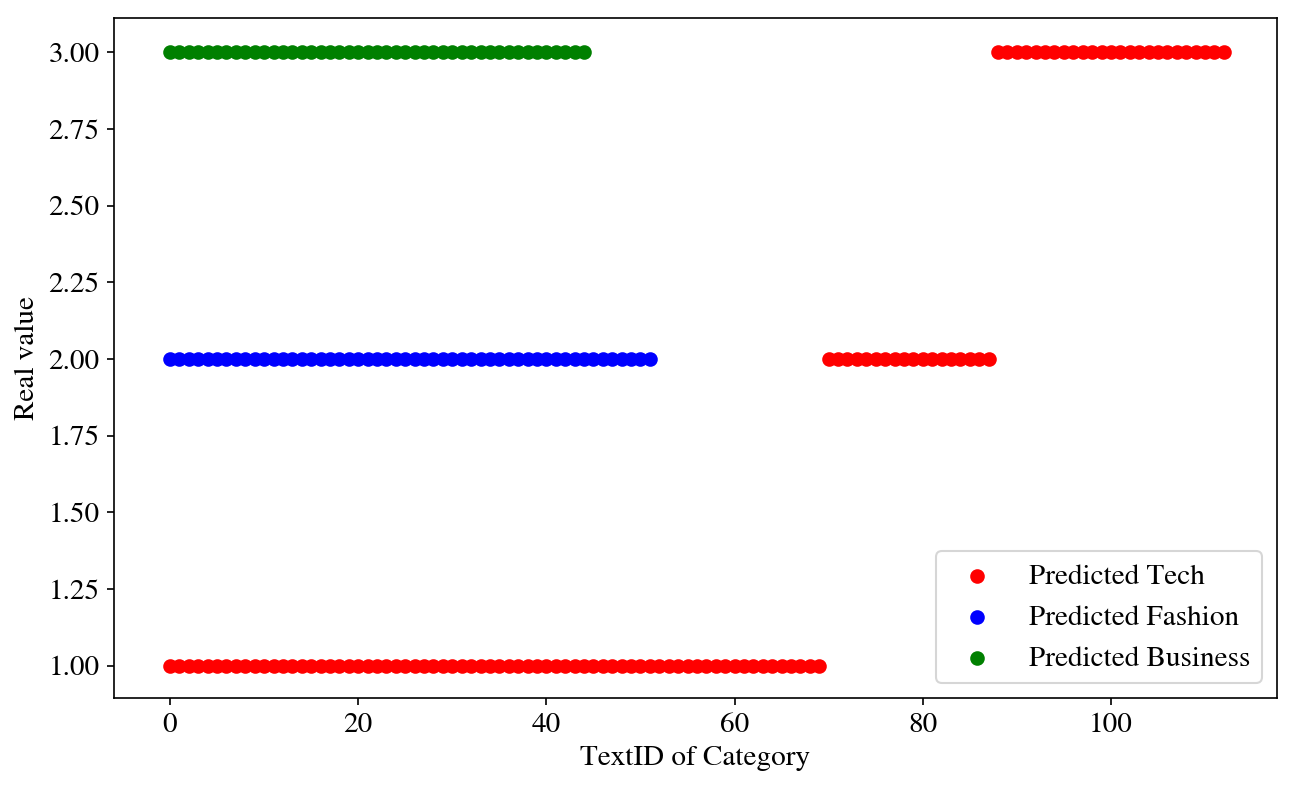

In [60]:
X = text_count

train = pd.DataFrame(text_count)
train["label"] = labels

train = train.as_matrix()
lbls = train
Z = Best_KClassifier.predict(X) 

print(Z)

techs = lbls[Z.ravel() == 1]
fashions = lbls[Z.ravel() == 2]
business = lbls[Z.ravel() == 3]
print(techs[:,6691])

i = range(0,len(techs[:,6691]))
j = range(0,len(fashions[:,6691]))
k = range(0,len(business[:,6691]))
Tech_scatter = plt.scatter(i,techs[:,6691],color ='red')
Fashion_scatter = plt.scatter(j,fashions[:,6691],color = 'blue')
Business_scatter = plt.scatter(k,business[:,6691],color = 'green')

plt.legend((Tech_scatter,Fashion_scatter,Business_scatter),
           ("Predicted Tech","Predicted Fashion","Predicted Business"))
# Put the result into a color plot
plt.xlabel("TextID of Category")
plt.ylabel("Real value")
plt.show()


As we can see, the model has a hard time predicting values for the business category, since a model with 100% accuracy, would predict 70 values on each label. While it predicted 70 of technology correctly, it also predicted some business texts as technology and as fashion. Overall the model had 77% accuracy approximately.

## Task 7, Comparison using stemming.

For comparison, let's perform tasks 1 through 6, but using a word stemmer, that transforms a word into it's most basic form. For example, playing would be turned into play.

First, let's create a function that stems words in the text. We will use the SnowballStemmer class from the nltk package to accomplish this. Finally, we apply this to a copy of the dataset which contains no stopwords.

In [30]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def Stem_Text(text):
    text = text.split(" ")
    word_list = [stemmer.stem(word) for word in text]
    return " ".join(word_list)
    

In [31]:
stemmed_dataset = data.copy()
stemmed_dataset.text = stemmed_dataset.text.apply(lambda text: Stem_Text(text))
stemmed_dataset.head()

type                                               text
0  technology  open mobil phone applic offer french real esta...
1  technology  give crime statist specif area beatl tour exam...
2  technology  thousand download week feedback total great fa...
3  technology  technolog similar rang use includ real estat s...
4  technology  telecom industri ripe consolid mexican billion...

Now, let's perform the same operations on this copy of the dataset, as we did on the previous cleaned dataset, and compare the results.

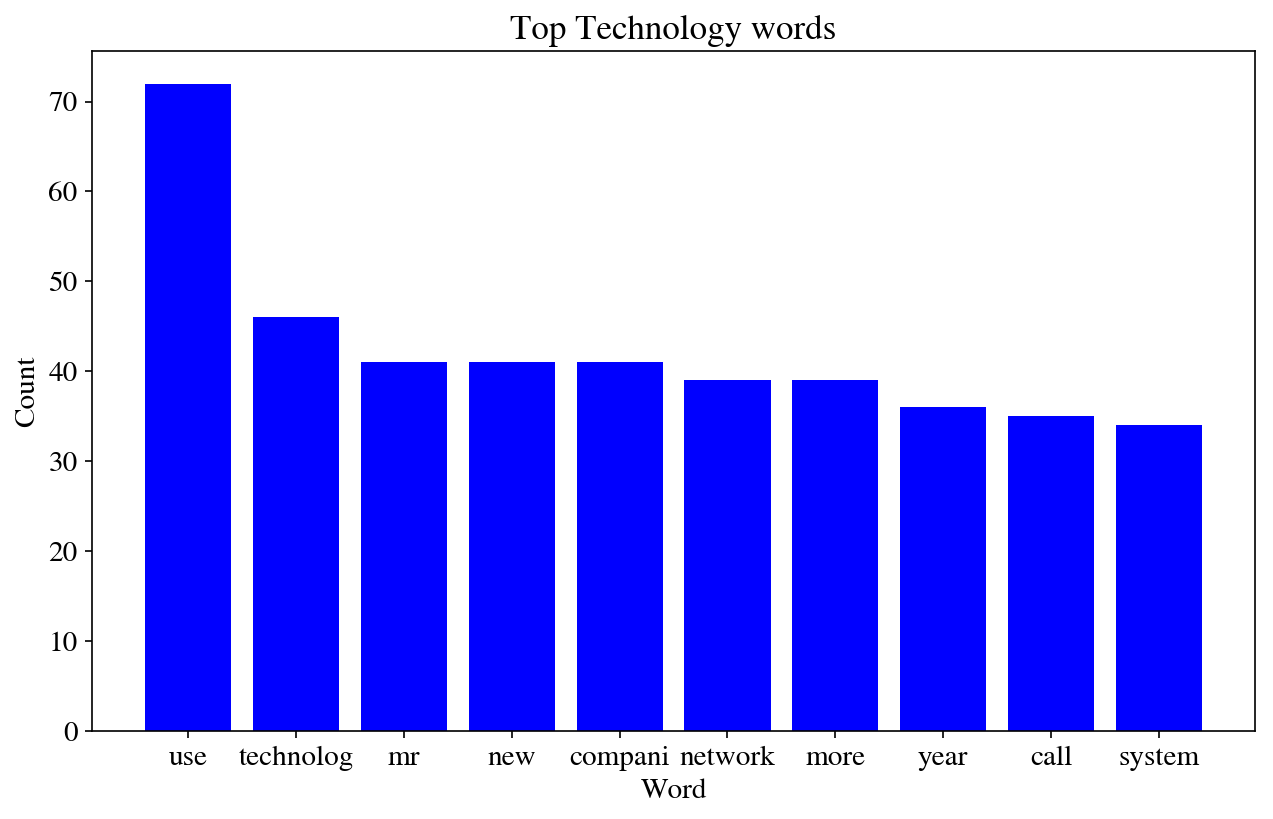

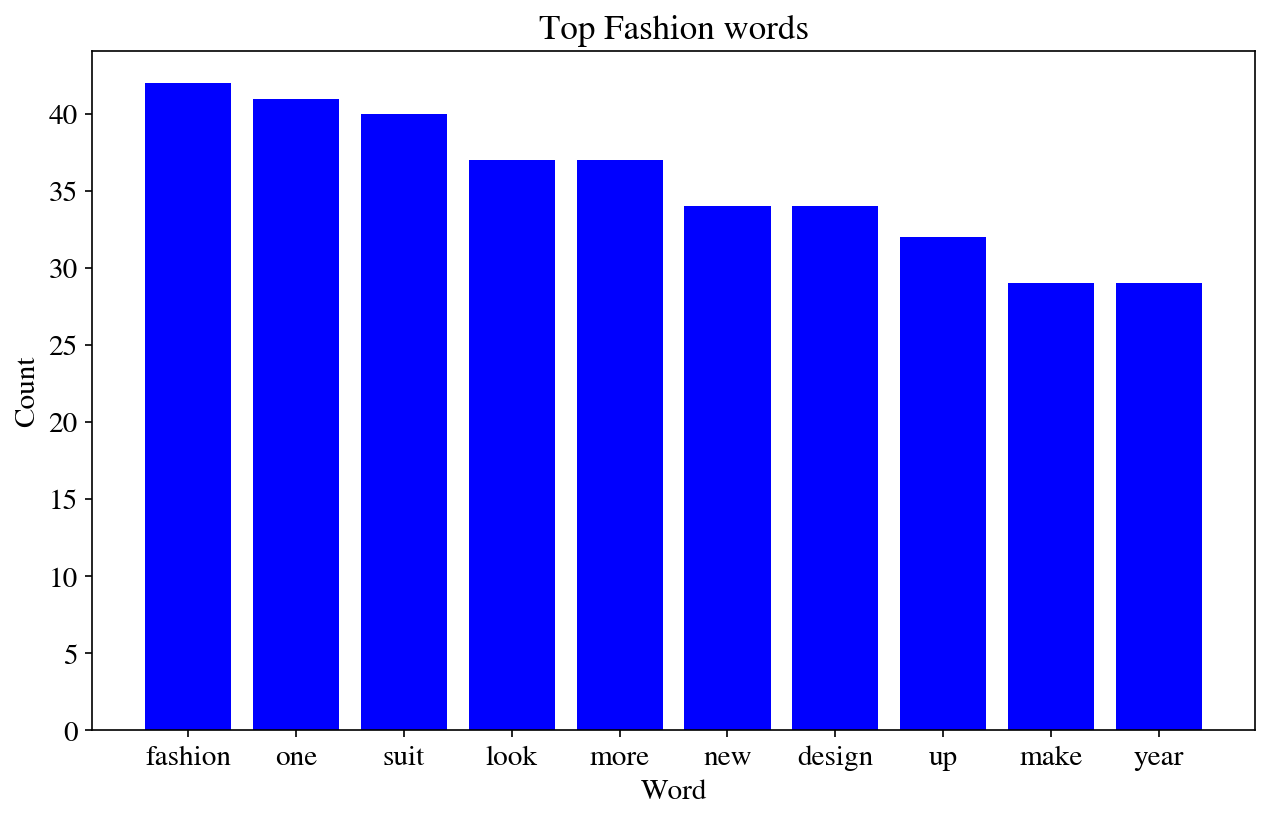

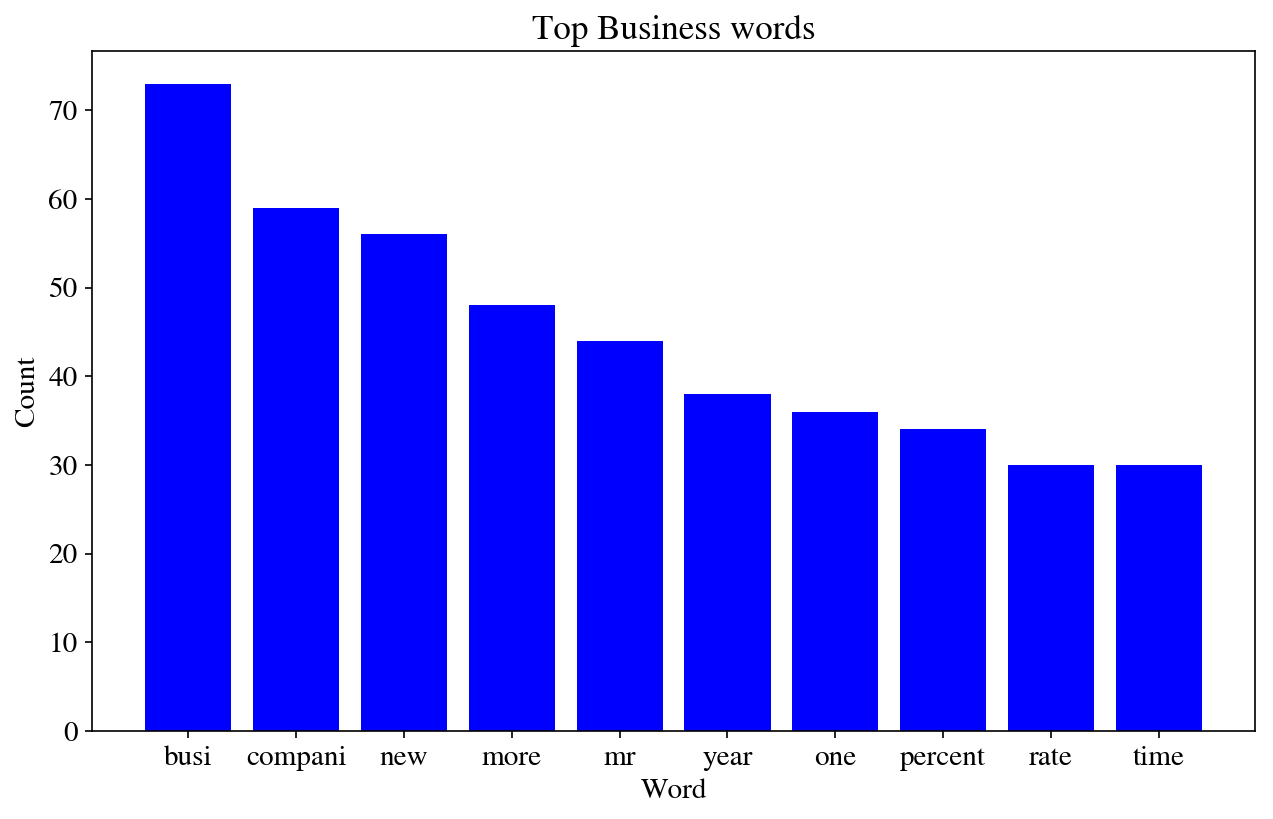

In [32]:
Stemmed_Tech_Words = Get_Word_Count(stemmed_dataset.loc[stemmed_dataset.type == "technology"])
Stemmed_Fashion_Words = Get_Word_Count(stemmed_dataset.loc[stemmed_dataset.type == "fashion&style"])
Stemmed_Business_Words = Get_Word_Count(stemmed_dataset.loc[stemmed_dataset.type == "business"])

plot_words(Stemmed_Tech_Words,"Top Technology words")
plot_words(Stemmed_Fashion_Words,"Top Fashion words")
plot_words(Stemmed_Business_Words,"Top Business words")

Not much change here.

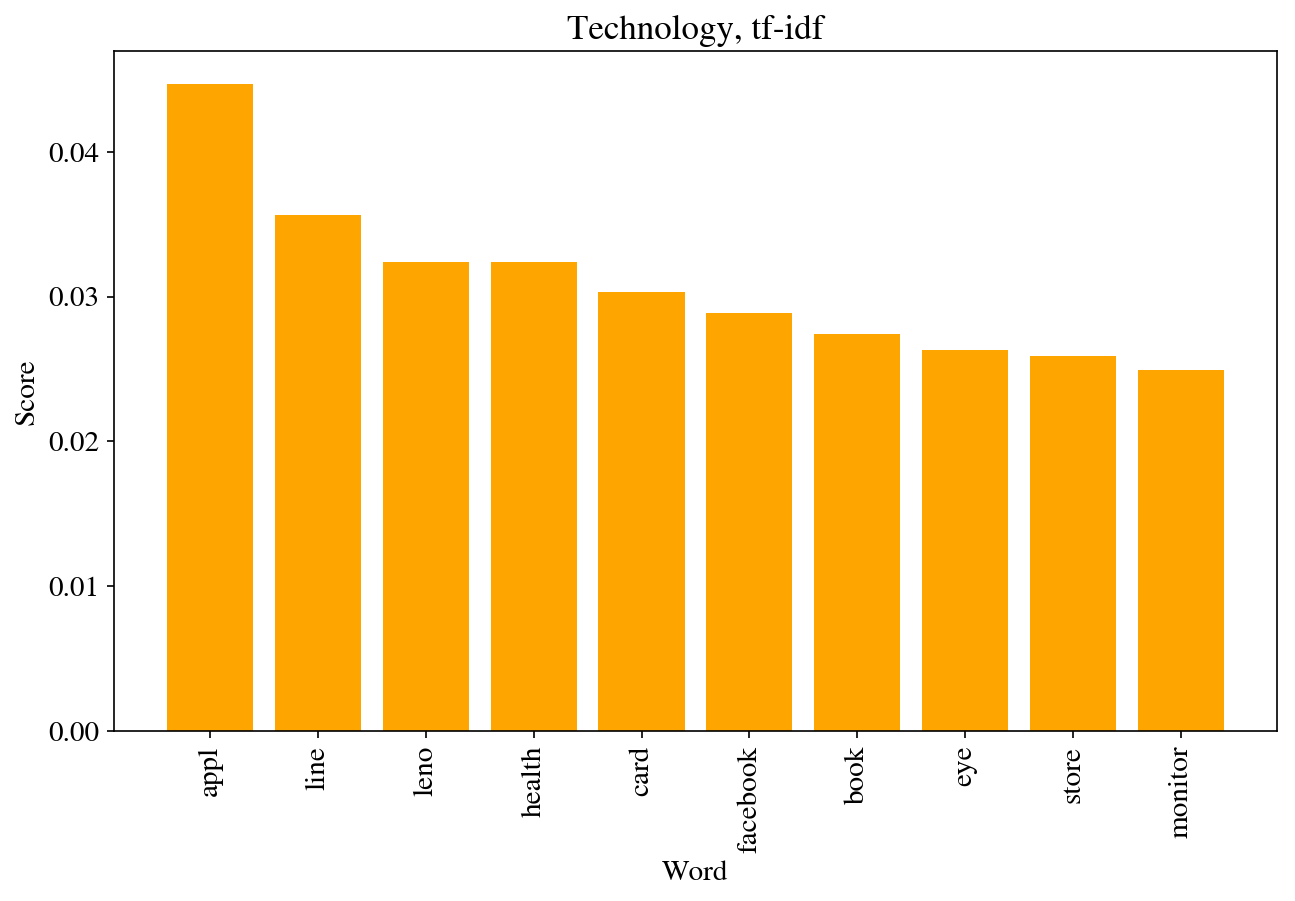

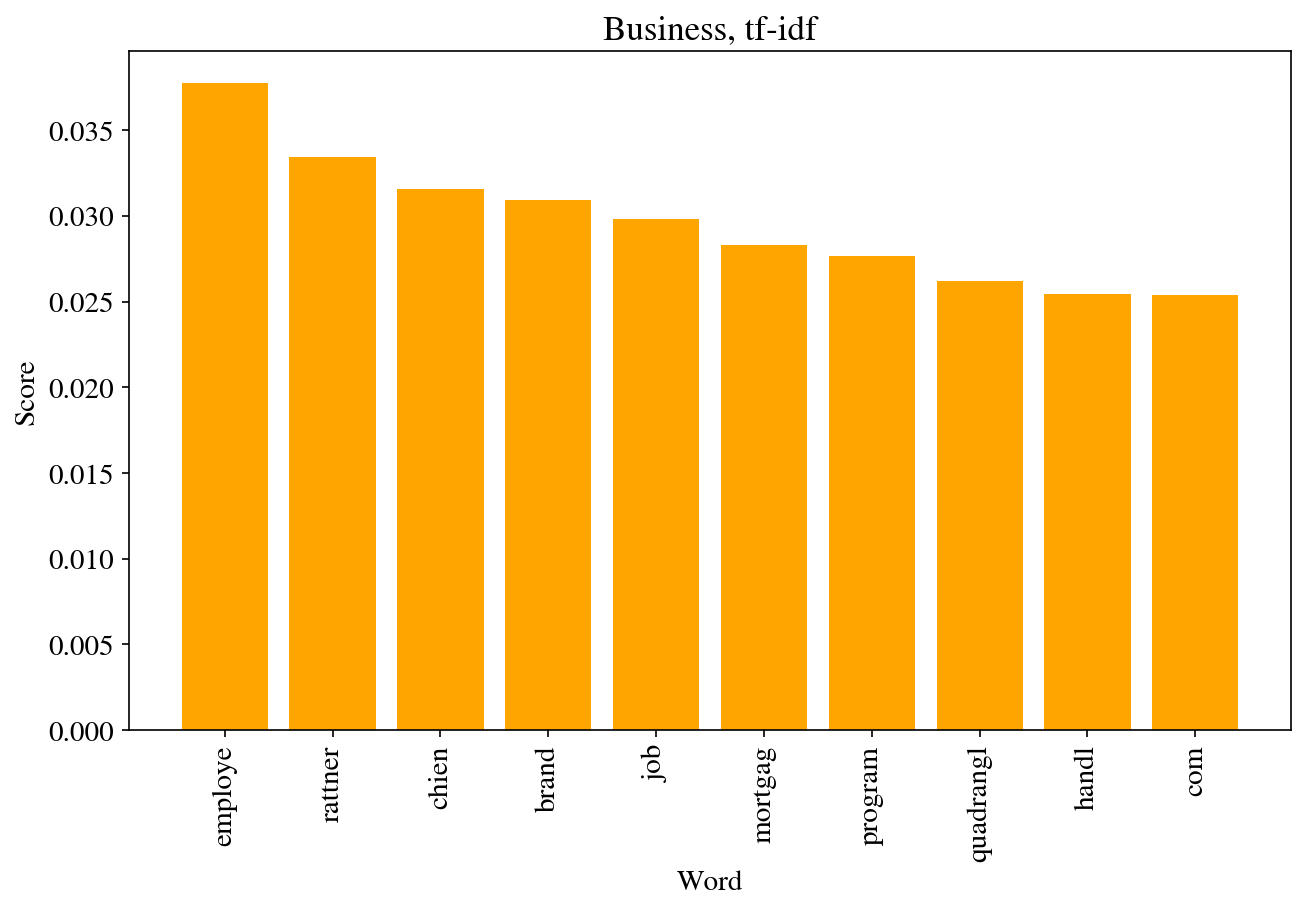

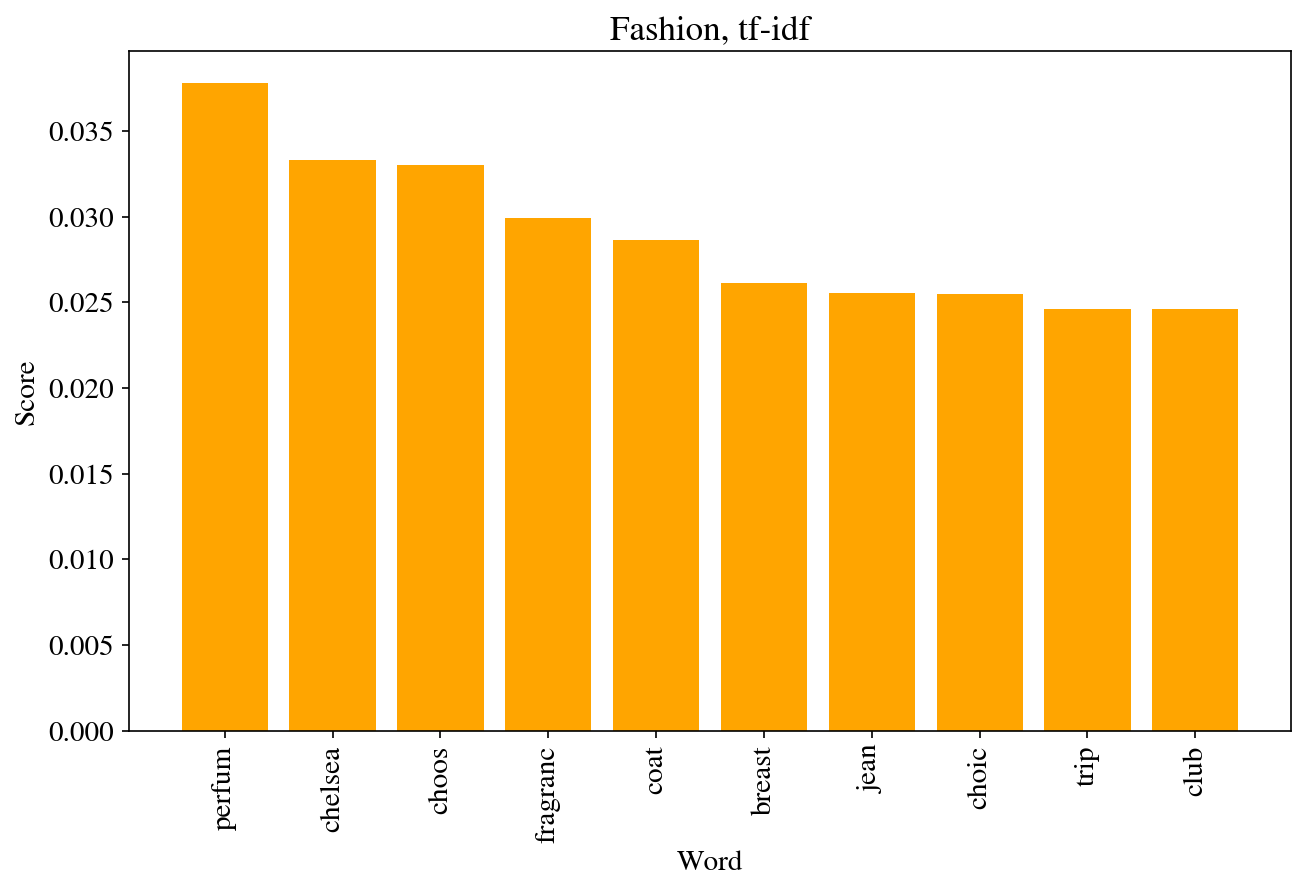

In [33]:
Stem_Tech_tfidf,Stem_Tech_vect = Calculate_tfidf(stemmed_dataset.loc[stemmed_dataset.type == "technology"])
Stem_Business_tfidf,Stem_bus_vect = Calculate_tfidf(stemmed_dataset.loc[stemmed_dataset.type == "business"])
Stem_Fashion_tfidf,Stem_fashion_vect = Calculate_tfidf(stemmed_dataset.loc[stemmed_dataset.type == "fashion&style"])

plot_scores(Stem_Tech_tfidf, "Technology, tf-idf")
plot_scores(Stem_Business_tfidf, "Business, tf-idf")
plot_scores(Stem_Fashion_tfidf, "Fashion, tf-idf")

There was some significant change on fashion. 

In [34]:
def Top_3_StemDocs(doc_type):
    doc_vector,addition = " ",0
    if doc_type == "Technology":
        doc_vector = Stem_Tech_vect
        
    elif doc_type == "Business":
        doc_vector = Stem_bus_vect
        
    else:
        doc_vector = Stem_fashion_vect
    
    result = { }
    for i in range(0,len(doc_vector)):
        related = Find_Related_Docs(doc_vector,i)
        texts = []
        for index in related:
            texts.append(comparison_data.text[index])
        result[i] = texts
        
    return pd.DataFrame({"Text_ID":list(result.keys()),
                         "Related_Texts":list(result.values())}).set_index("Text_ID")

Tech_Related_StemDocs = Top_3_StemDocs("Technology")
Business_Related_StemDocs = Top_3_StemDocs("Business")
Fashion_Related_StemDocs = Top_3_StemDocs("Fashion")
    

In [35]:
Display_Text_AndRelated(0,Tech_Related_StemDocs)

Original Text:
Open the mobile phone application offered by a French real estate agency and point your phone at a building along the  or some other street in Paris. Within seconds, you will see the propertys value per square meter, superimposed over a live image of the building streamed through the phones camera. Speed and convenience delivered with the aim of a smartphone. Could this be the new frontier of on-demand property search? It depends whom you ask. The application, engineered by Layar, a 10-month-old company based in Amsterdam, uses augmented reality technology, or A.R., to harness a phones camera, global positioning system and compass. Elements like statistics and 3-D images are, essentially, layered over a live picture so the user gets a single view with all available information. These A.R. mash-ups already are being used to display information about tourist sites, chart subway stops and restaurants, allow interior designers to superimpose new furniture or color sch

This example gives the same results, but on a different order.

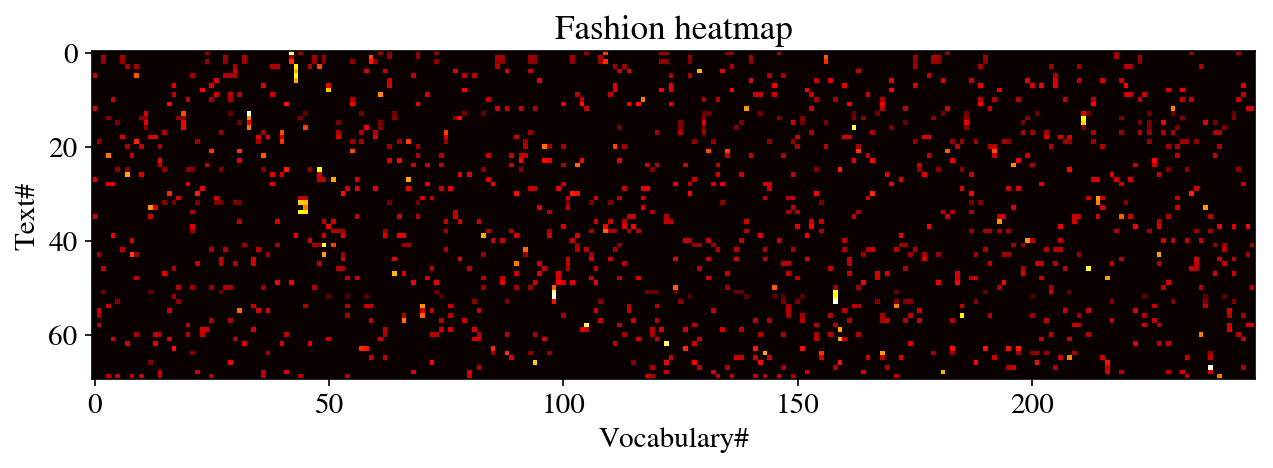

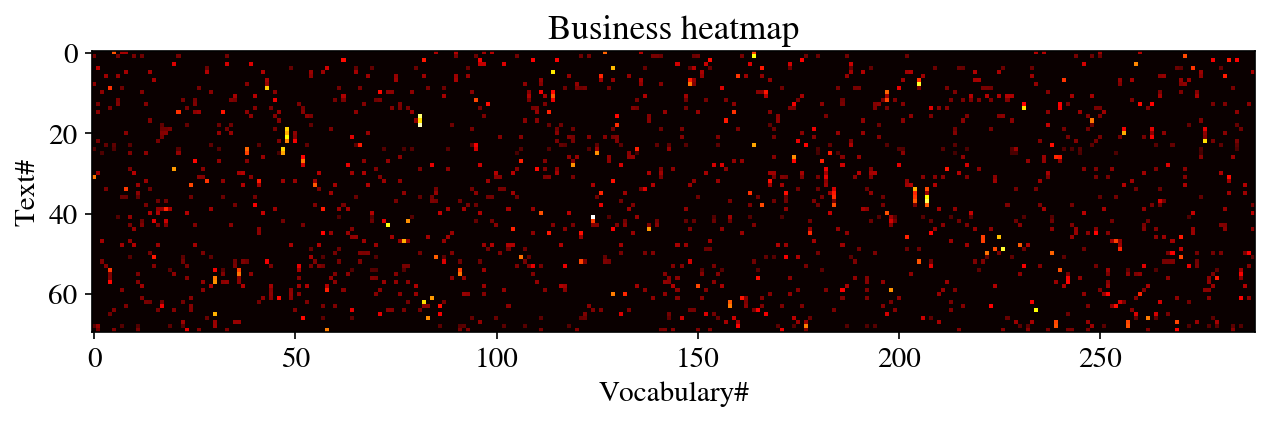

In [53]:
Plot_Heatmap(Stem_fashion_vect,"Fashion heatmap")
Plot_Heatmap(Stem_Tech_vect,"Technology heatmap")
Plot_Heatmap(Stem_bus_vect,"Business heatmap")

The kernel matrices are really different for each one, actually! It's really hard to notice, because of all the black, but a comparison between the stemmed and unstemmed chart should lead to more visible results.

In [37]:
doc_term_Stemmatrix = count_vectorizer.fit_transform(list(stemmed_dataset.text))
Stem_text_count = doc_term_Stemmatrix.toarray()


In [58]:
def Optimize_StemKClassifier(Stem_text_count,labels):
    best_accuracy = 0
    best_k = 0
    accuracy_list = []
    for k in range(2,30):
        Kneigh_classifier = KNeighborsClassifier(n_neighbors=k)
        Kneigh_classifier.fit(Stem_text_count,labels)
        accuracy = Kneigh_classifier.score(Stem_text_count,labels)
        accuracy_list.append(accuracy)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_k = k
    print("Best K is:" + str(best_k))
    Plot_Accuracies(accuracy_list)
    return best_k

Best K is:3


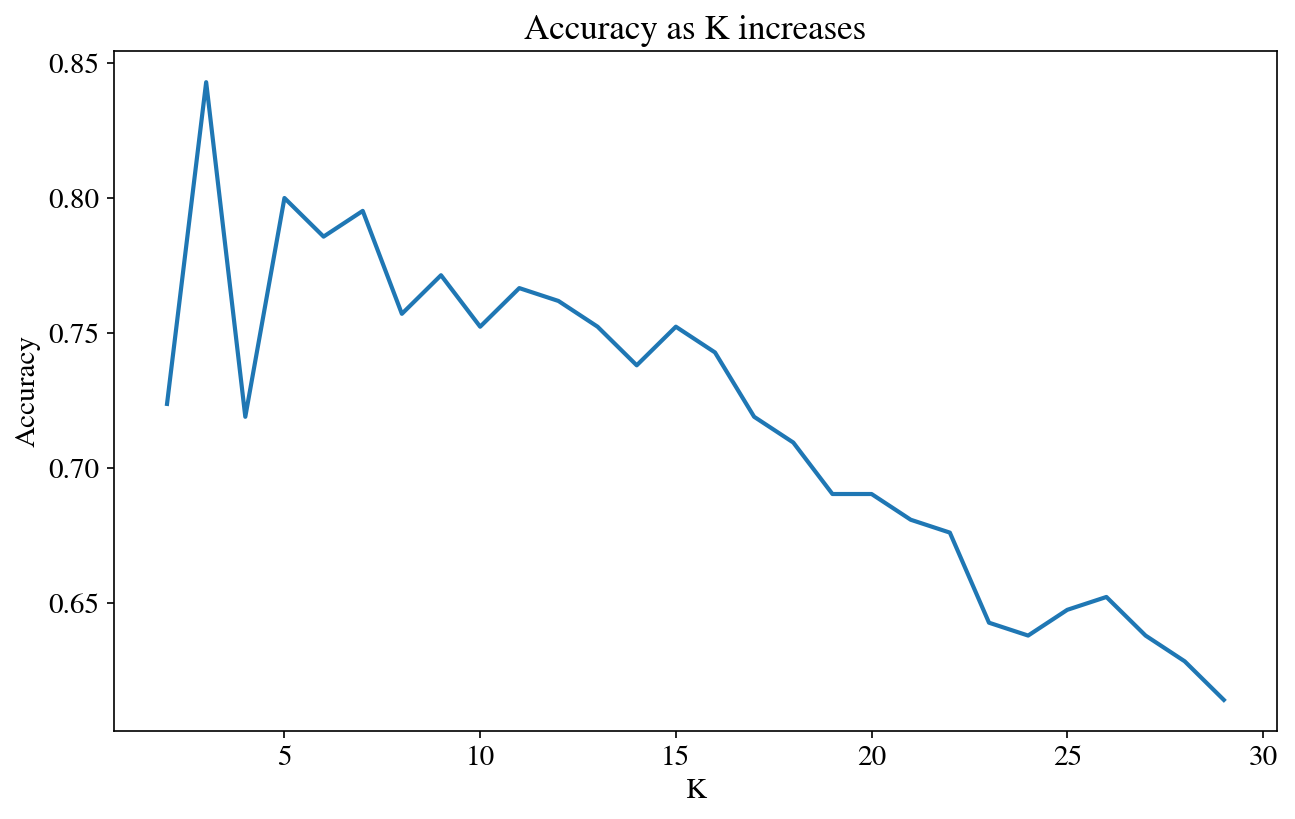

0.84285714285714286

In [59]:
best_Stemk = Optimize_StemKClassifier(Stem_text_count,labels)
Best_StemKClassifier = KNeighborsClassifier(n_neighbors = best_Stemk)
Best_StemKClassifier.fit(Stem_text_count,labels)
accuracy = Best_StemKClassifier.score(Stem_text_count,labels)
accuracy

This model has seemingly better accuracy than our previous model, as well as having a lower value for K.

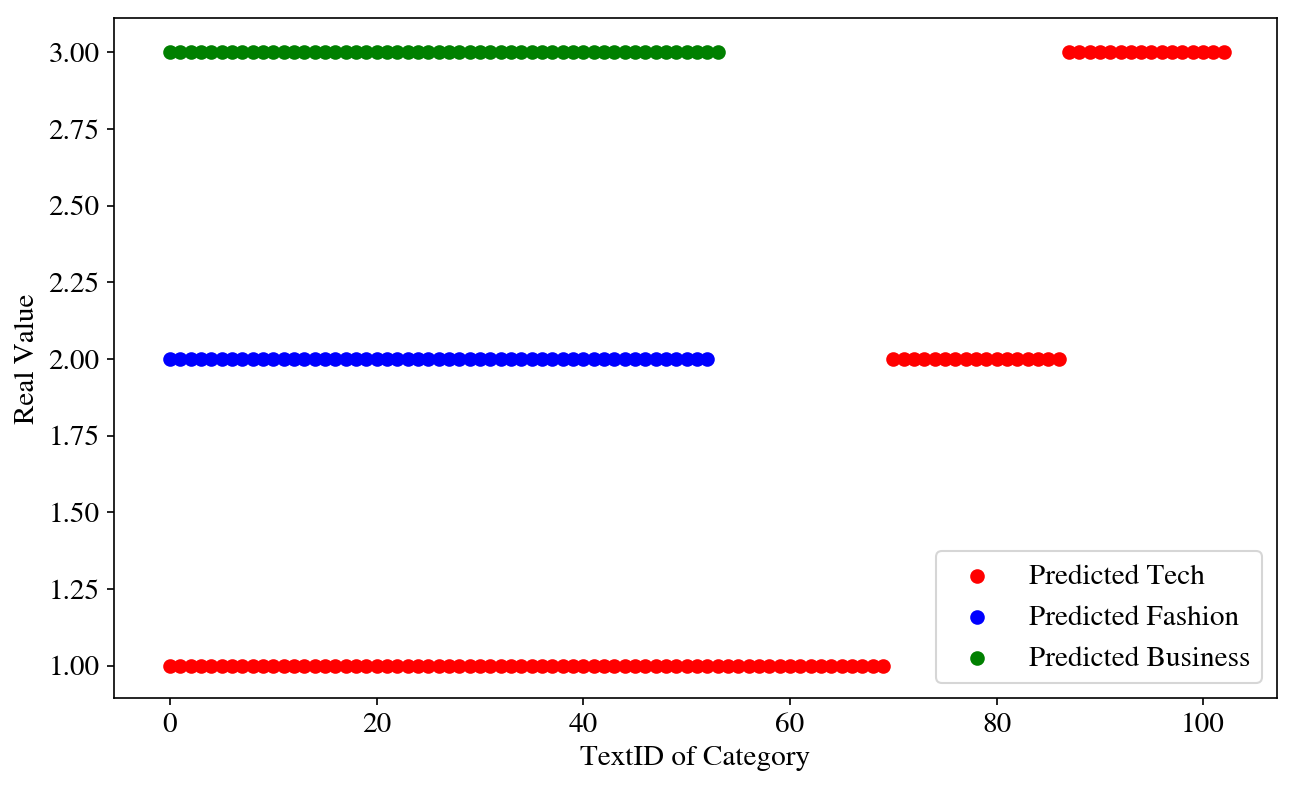

In [61]:
X = Stem_text_count

def Plot_Comparison(X,y,Classifier):
    train = pd.DataFrame(X)
    train["label"] = y

    train = train.as_matrix()
    lbls = train

    Z = Classifier.predict(X) 


    techs = lbls[Z.ravel() == 1]
    fashions = lbls[Z.ravel() == 2]
    business = lbls[Z.ravel() == 3]

    
    i = range(0,len(techs[:,4849]))
    j = range(0,len(fashions[:,4849]))
    k = range(0,len(business[:,4849]))
    tech_scatter = plt.scatter(i,techs[:,4849],color ='red')
    fashion_scatter = plt.scatter(j,fashions[:,4849],color = 'blue')
    business_scatter = plt.scatter(k,business[:,4849],color = 'green')
    # Put the result into a color plot
    plt.legend((tech_scatter,fashion_scatter,business_scatter),
           ("Predicted Tech","Predicted Fashion","Predicted Business"))
# Put the result into a color plot
    plt.xlabel("TextID of Category")
    plt.ylabel("Real Value")
    plt.show()
Plot_Comparison(X,labels,Best_StemKClassifier)

The stemmed version of the model has a lot less classification error for fashion categories, but it still presents a lot of misclassification for the business category and the technology category, classifying a lot of them as business.

# Conclusion

In the end, the stemmed version of the Kneighbors classifier performed better than the non-stemmed version of the model, resultin in a greater prediction accuracy, by approximately 2%. In all other aspects, both models are pretty similar, like in the word counts and tf-idf scores, except for a few words here and there.